<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

## Loading the lib

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

In [2]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [8]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [9]:
df.corr()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,0.763134,...,0.018791,-0.164921,-0.009747,0.080650,-0.099128,0.864388,0.310045,0.246353,0.134237,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,0.373547,...,0.006803,-0.078395,0.020002,0.030625,-0.048279,0.379413,0.093600,0.313359,0.041055,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,0.421782,...,-0.105812,-0.191058,-0.019967,-0.030494,-0.172171,0.409357,0.018386,0.212929,-0.016841,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,0.041808,...,0.056977,0.102809,0.081133,-0.031556,-0.041392,0.065595,-0.156498,0.680313,0.030725,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,-0.072735,...,0.258698,0.552996,-0.016247,-0.132215,0.427315,-0.054581,-0.007227,0.206718,0.013127,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,0.363386,...,0.038381,-0.250044,0.119708,0.173247,-0.151965,0.377186,0.068718,0.540052,0.131292,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,-0.097618,...,0.308633,0.623509,-0.034021,-0.103499,0.603133,-0.113065,-0.027882,0.083494,0.174955,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,0.322514,...,0.251069,-0.067146,0.370878,0.311056,-0.045058,0.351030,0.080060,0.156920,0.407553,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,-0.073043,...,0.667535,0.343631,0.389670,0.382925,0.321433,-0.042637,0.178317,0.033558,0.598156,0.174356
longmon,0.763134,0.373547,0.421782,0.041808,-0.072735,0.363386,-0.097618,0.322514,-0.073043,1.000000,...,-0.001372,-0.223929,0.032913,0.060614,-0.124605,0.901631,0.247302,0.122550,0.072519,-0.292026


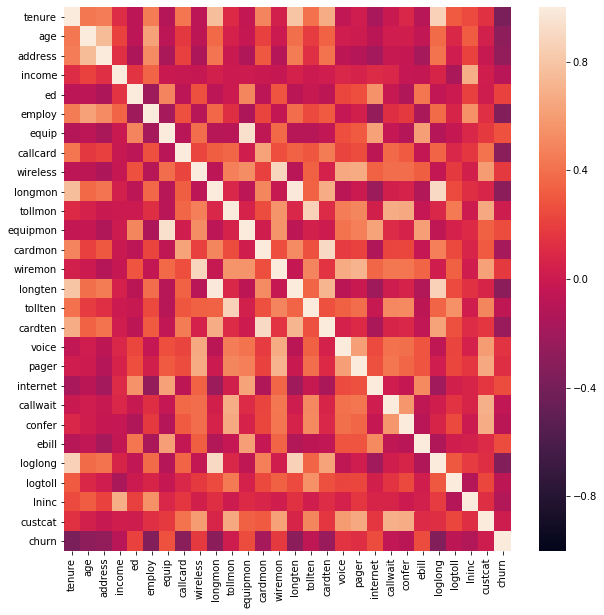

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmin=-1)
plt.show()

## Data preprocessing and Data cleaning

In [20]:
df.corr()['churn'].sort_values(ascending=False)

churn       1.000000
equip       0.275284
equipmon    0.255348
ebill       0.254838
internet    0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
tollmon     0.014356
callwait   -0.052885
tollten    -0.059482
logtoll    -0.070156
confer     -0.081361
income     -0.090790
lninc      -0.117459
cardmon    -0.177163
cardten    -0.228634
address    -0.260659
age        -0.287697
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64

In [23]:
anaser = df.corr()['churn']
for key, _ in anaser.to_dict().items():
    #print(key)
    if abs(anaser[key]) < 0.1:
        df = df.drop([key], axis=1)
    pass

In [24]:
df.head()

,tenure,age,address,ed,employ,equip,callcard,wireless,longmon,equipmon,...,wiremon,longten,cardten,voice,pager,internet,ebill,loglong,lninc,churn
0,11.0,33.0,7.0,5.0,5.0,0.0,1.0,1.0,4.40,0.0,...,35.7,42.00,125.0,1.0,1.0,0.0,0.0,1.482,4.913,1.0
1,33.0,33.0,12.0,2.0,0.0,0.0,0.0,0.0,9.45,0.0,...,0.0,288.80,0.0,0.0,0.0,0.0,0.0,2.246,3.497,1.0
2,23.0,30.0,9.0,1.0,2.0,0.0,0.0,0.0,6.30,0.0,...,0.0,157.05,0.0,0.0,0.0,0.0,0.0,1.841,3.401,0.0
3,38.0,35.0,5.0,2.0,10.0,1.0,1.0,1.0,6.05,50.1,...,64.9,239.55,880.0,1.0,1.0,1.0,1.0,1.800,4.331,0.0
4,7.0,35.0,14.0,2.0,15.0,0.0,1.0,0.0,7.10,0.0,...,0.0,47.45,145.0,1.0,0.0,0.0,0.0,1.960,4.382,0.0


In [25]:
df.corr()['churn'].sort_values()

tenure     -0.376860
employ     -0.337969
loglong    -0.336869
callcard   -0.311451
longten    -0.294906
longmon    -0.292026
age        -0.287697
address    -0.260659
cardten    -0.228634
cardmon    -0.177163
lninc      -0.117459
pager       0.124623
voice       0.142315
wireless    0.174356
wiremon     0.177483
ed          0.216112
internet    0.254838
ebill       0.254838
equipmon    0.255348
equip       0.275284
churn       1.000000
Name: churn, dtype: float64

In [29]:
# extracting features with spectacular correlation with churn
X = np.asarray(df.drop(['churn'], axis=1))
type(X)

numpy.ndarray

In [30]:
Y = np.asarray(df['churn'])

In [32]:
print(X[:5], Y[:5])

[[ 11.     33.      7.      5.      5.      0.      1.      1.      4.4
    0.     15.25   35.7    42.    125.      1.      1.      0.      0.
    1.482   4.913]
 [ 33.     33.     12.      2.      0.      0.      0.      0.      9.45
    0.      0.      0.    288.8     0.      0.      0.      0.      0.
    2.246   3.497]
 [ 23.     30.      9.      1.      2.      0.      0.      0.      6.3
    0.      0.      0.    157.05    0.      0.      0.      0.      0.
    1.841   3.401]
 [ 38.     35.      5.      2.     10.      1.      1.      1.      6.05
   50.1    23.25   64.9   239.55  880.      1.      1.      1.      1.
    1.8     4.331]
 [  7.     35.     14.      2.     15.      0.      1.      0.      7.1
    0.     23.75    0.     47.45  145.      1.      0.      0.      0.
    1.96    4.382]] [1. 1. 0. 0. 0.]


In [33]:
df.drop(['churn'], axis=1).describe()

,tenure,age,address,ed,employ,equip,callcard,wireless,longmon,equipmon,cardmon,wiremon,longten,cardten,voice,pager,internet,ebill,loglong,lninc
count,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,15.783250,14.358750,12.2170,577.770750,650.663750,0.295000,0.275000,0.440000,0.440000,2.193285,3.951015
std,21.640971,13.076803,10.158419,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,19.557103,14.781269,21.6326,746.608653,941.470689,0.457187,0.447635,0.497633,0.497633,0.731282,0.752553
min,1.000000,19.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,0.000000,0.000000,0.0000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095000,2.197000
25%,16.750000,31.000000,3.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,0.000000,0.000000,0.0000,79.337500,0.000000,0.000000,0.000000,0.000000,0.000000,1.711750,3.434000
50%,33.500000,40.000000,9.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,0.000000,12.500000,0.0000,289.525000,342.500000,0.000000,0.000000,0.000000,0.000000,2.110000,3.871000
75%,55.250000,51.000000,18.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,33.012500,20.750000,23.4625,806.762500,921.250000,1.000000,1.000000,1.000000,1.000000,2.660000,4.382000
max,72.000000,76.000000,48.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,63.250000,109.250000,109.7000,4333.000000,7515.000000,1.000000,1.000000,1.000000,1.000000,4.132000,7.419000


## Normalisation

- as we can see there are data points ranging from different vlaues, normalisaiton is needed here.
- This can be done with the help of Standardscaler from sklearn

In [34]:
X = preprocessing.StandardScaler().fit_transform(X)
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  1.6961288 , -0.58477841,
        -0.85972695,  0.64686916,  1.56469673, -0.74922681, -0.80905935,
         0.06044721,  1.08826163, -0.71940664, -0.55974431,  1.54590766,
         1.62368828, -0.88640526, -0.88640526, -0.97509593,  1.28150384],
       [-0.11604313, -0.62595491,  0.03454064, -0.6433592 , -1.14437497,
        -0.85972695, -1.54590766, -0.63910148, -0.23718629, -0.80905935,
        -0.97385292, -0.56616669, -0.38801572, -0.69284848, -0.64686916,
        -0.61588176, -0.88640526, -0.88640526,  0.07226665, -0.60481397],
       [-0.57928917, -0.85594447, -0.261522  , -1.42318853, -0.92053635,
        -0.85972695, -1.54590766, -0.63910148, -0.5565779 , -0.80905935,
        -0.97385292, -0.56616669, -0.56492315, -0.69284848, -0.64686916,
        -0.61588176, -0.88640526, -0.88640526, -0.48294519, -0.73269992],
       [ 0.11557989, -0.47262854, -0.65627219, -0.6433592 , -0.02518185,
         1.16316   ,  0.64686916,  1.56469673, -

In [35]:
# splitting our data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(140, 20) (140,)
(60, 20) (60,)


## Model creation

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [37]:
# instantiate the regressor
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = lr.predict(x_test)
y_pred

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0.])

In [41]:
y_pred_log = lr.predict_log_proba(x_test)
y_pred_log

array([[-0.94787729, -0.49030893],
       [-1.29103866, -0.32156296],
       [-0.50706669, -0.92195576],
       [-0.55191984, -0.85765213],
       [-0.55899034, -0.8481324 ],
       [-1.19074836, -0.36239654],
       [-0.17674145, -1.82013687],
       [-0.90669622, -0.51727349],
       [-0.87763559, -0.53745162],
       [-0.37118021, -1.17092366],
       [-0.33819262, -1.24847493],
       [-0.39244427, -1.1251739 ],
       [-0.52724019, -0.89216328],
       [-0.25679337, -1.48513411],
       [-0.94839049, -0.4899843 ],
       [-0.38666149, -1.13731471],
       [-0.77300268, -0.6191997 ],
       [-0.85187062, -0.55619989],
       [-0.65311663, -0.73484724],
       [-0.6503251 , -0.73788534],
       [-0.33356707, -1.26006302],
       [-0.98690554, -0.4663755 ],
       [-1.02571202, -0.44401014],
       [-0.85414498, -0.55451104],
       [-0.43050724, -1.0503343 ],
       [-0.30857022, -1.32612679],
       [-0.6519102 , -0.73615806],
       [-0.30434176, -1.33791852],
       [-0.17373319,

In [43]:
y_pred_prob = lr.predict_proba(x_test)
y_pred_prob

array([[0.38756284, 0.61243716],
       [0.27498502, 0.72501498],
       [0.60225961, 0.39774039],
       [0.57584322, 0.42415678],
       [0.57178608, 0.42821392],
       [0.30399368, 0.69600632],
       [0.83799642, 0.16200358],
       [0.40385627, 0.59614373],
       [0.41576479, 0.58423521],
       [0.6899196 , 0.3100804 ],
       [0.71305793, 0.28694207],
       [0.67540399, 0.32459601],
       [0.59023165, 0.40976835],
       [0.77352803, 0.22647197],
       [0.38736399, 0.61263601],
       [0.67932102, 0.32067898],
       [0.46162487, 0.53837513],
       [0.42661615, 0.57338385],
       [0.52042129, 0.47957871],
       [0.52187609, 0.47812391],
       [0.71636385, 0.28363615],
       [0.3727283 , 0.6272717 ],
       [0.35854109, 0.64145891],
       [0.42564697, 0.57435303],
       [0.65017921, 0.34982079],
       [0.73449638, 0.26550362],
       [0.52104952, 0.47895048],
       [0.73760874, 0.26239126],
       [0.84052112, 0.15947888],
       [0.57071231, 0.42928769],
       [0.

## Evaluation

In [45]:
# jaccard index
from sklearn.metrics import jaccard_similarity_score, jaccard_score

print("%.2f" %jaccard_score(y_test, y_pred))
print("%.2f" %jaccard_similarity_score(y_test, y_pred))

0.36
0.70


Confusion matrix withiout normalisation
[[10  5]
 [13 32]]


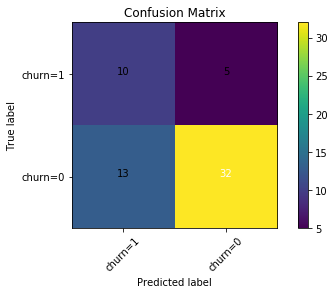

In [49]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confuison_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix'):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalised confusion matrix')
        
    else:
        print('Confusion matrix withiout normalisation')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf = confusion_matrix(y_test, y_pred, labels=[1, 0])
np.set_printoptions(precision=2)

plt.figure()
plot_confuison_matrix(cnf, classes=['churn=1', 'churn=0'], normalize=False)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78        45
         1.0       0.43      0.67      0.53        15

    accuracy                           0.70        60
   macro avg       0.65      0.69      0.65        60
weighted avg       0.76      0.70      0.72        60



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

In [52]:
# log loss
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_prob)  # probability of a customer churn is yes

0.5744366915907981

In [55]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(x_train,y_train)
yhat_prob2 = LR2.predict_proba(x_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.48
